# Unbiasing COVID-19 Case Count
Kartik Chugh - May 3, 2020

 <img src="china-data.png" />

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [37]:
ONSET_TO_DEATH = 17.3 # https://midasnetwork.us/covid-19/
TRUE_MORTALITY = 0.01
DOUBLING_TIME = 2.5

In [60]:
url = 'https://covidtracking.com/api/v1/us/daily.csv'
data = pd.read_csv(url, 
            usecols=['date', 'positiveIncrease', 'deathIncrease'], 
            parse_dates=['date'], 
            index_col=['date']).sort_index().iloc[1:]

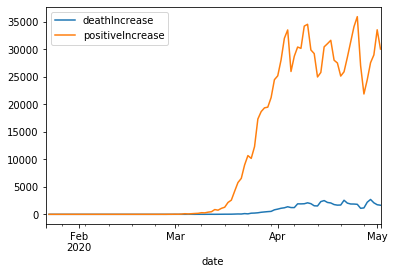

In [39]:
data.plot()

In [74]:
pd.set_option('display.max_rows', None)
data

,deathIncrease,positiveIncrease
date,,
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
2020-01-28,0.0,0.0
2020-01-29,0.0,0.0
2020-01-30,0.0,0.0
2020-01-31,0.0,0.0


In [80]:
firstDeaths = data['deathIncrease'].ne(0).idxmax()

In [81]:
firstTrueCases = firstDeaths - ONSET_TO_DEATH

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'float'

In [78]:

for date, row in data.iterrows():
    if (date > firstDeath):
        print(row)

deathIncrease       0.0
positiveIncrease    0.0
Name: 2020-02-27 00:00:00, dtype: float64
deathIncrease       2.0
positiveIncrease    7.0
Name: 2020-02-28 00:00:00, dtype: float64
deathIncrease       1.0
positiveIncrease    9.0
Name: 2020-02-29 00:00:00, dtype: float64
deathIncrease        3.0
positiveIncrease    22.0
Name: 2020-03-01 00:00:00, dtype: float64
deathIncrease        3.0
positiveIncrease    13.0
Name: 2020-03-02 00:00:00, dtype: float64
deathIncrease        3.0
positiveIncrease    41.0
Name: 2020-03-03 00:00:00, dtype: float64
deathIncrease         2.0
positiveIncrease    113.0
Name: 2020-03-04 00:00:00, dtype: float64
deathIncrease        4.0
positiveIncrease    68.0
Name: 2020-03-05 00:00:00, dtype: float64
deathIncrease         6.0
positiveIncrease    112.0
Name: 2020-03-06 00:00:00, dtype: float64
deathIncrease         1.0
positiveIncrease    151.0
Name: 2020-03-07 00:00:00, dtype: float64
deathIncrease         4.0
positiveIncrease    183.0
Name: 2020-03-08 00:00:00, d